In [1]:
import numpy as np
import odl
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# # from ClassFiles import util as ut 
# from ClassFiles.Framework import AdversarialRegulariser
# from ClassFiles.networks import ConvNetClassifier
# from ClassFiles.forward_models import CT, CT_undersampled
# from ClassFiles.data_pips import LUNA
from operators import MRI
from data import fMRIData
import torch
import os
import json
from tqdm import tqdm
from skimage.transform import resize as imresize
import utils

In [2]:
path = '/store/CCIMI/sl767/fMRI/knee_mri_training/'

In [3]:
with open(path+'individual_npy.json', 'r') as fp:
    files = json.load(fp)

In [4]:
# n = 0
# for k, v in files.items():
#     n += len(v)
# print(n)

In [5]:
percentile = 99
samples = range(400)[0::100]

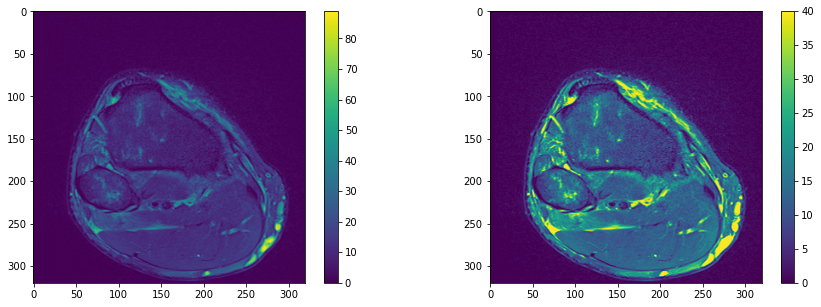

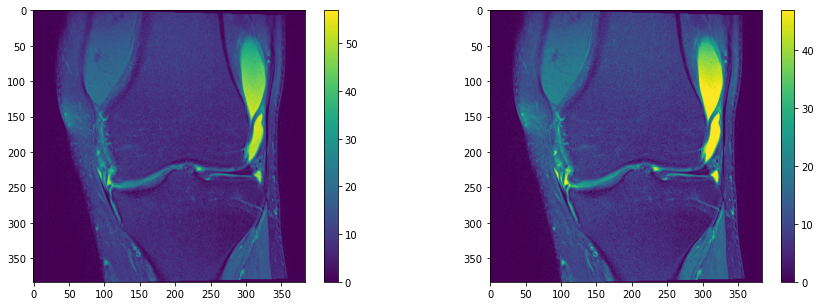

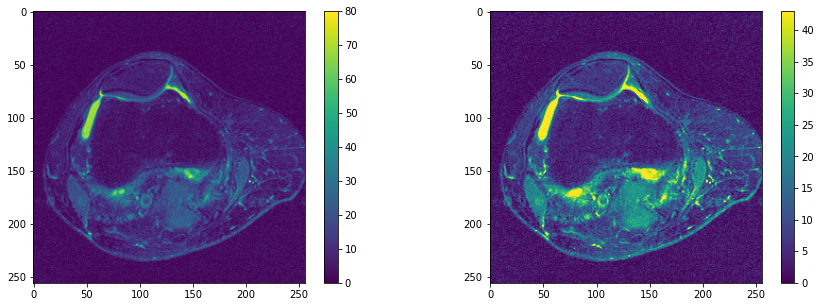

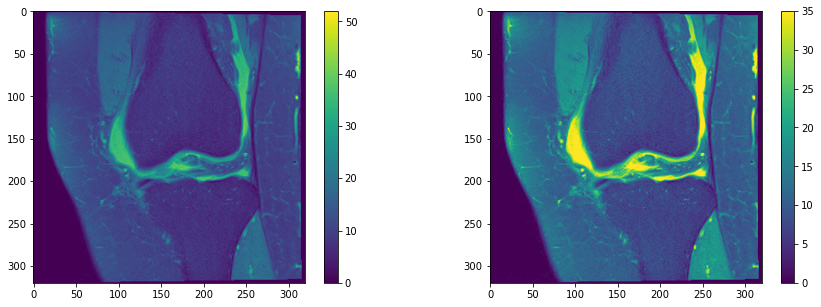

In [6]:
for i in samples:
    sample = np.load(files[i]).astype(np.float32)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(sample)
    plt.colorbar()
    plt.subplot(122)
    p = np.percentile(sample, percentile)
    sample[sample>p]=p
    plt.imshow(sample)
    plt.colorbar()
    plt.show()

In [7]:
sample = imresize(sample, (256,256), order=0)
sample = (sample - sample.mean())/sample.std()

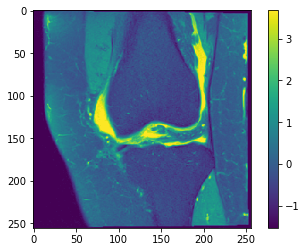

In [8]:
plt.imshow(sample)
plt.colorbar()

Sampling pattern loaded


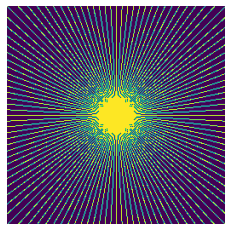

MRI Operator
Resolution 256
Subsampling level: 0.24310302734375

In [39]:
MRI_Op = MRI(size=256, n_directions=60)
MRI_Op

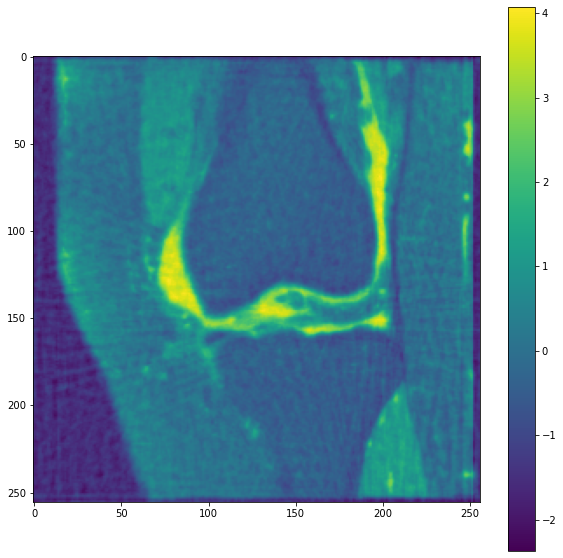

In [10]:
m = True
plt.figure(figsize=(10,10))
plt.imshow(MRI_Op.inverse(MRI_Op.forward(sample, mask=m), mask=m))
plt.colorbar()

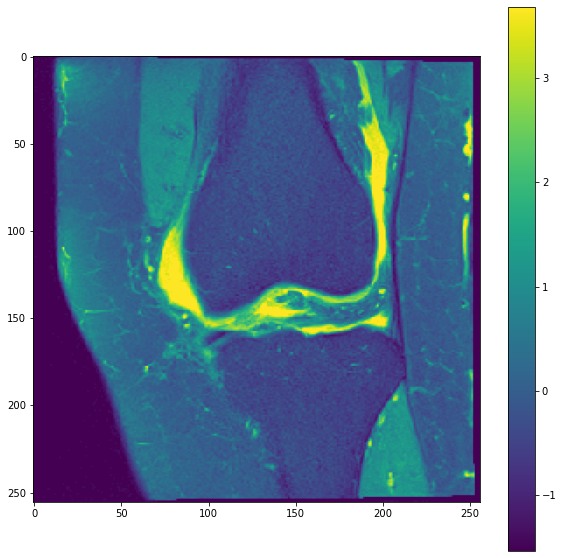

In [11]:
m = False
plt.figure(figsize=(10,10))
plt.imshow(MRI_Op.inverse(MRI_Op.forward(sample, mask=m), mask=m))
plt.colorbar()

In [14]:
ft.shape

(256, 256)

In [15]:
def embed_real(sample):
    s = sample.unsqueeze(-1)
    zeros = s.new_zeros(size=s.size())
    return torch.cat([s, zeros], axis=-1)

In [16]:
sample_torch = torch.Tensor(np.expand_dims(sample, 0))
sample_torch = embed_real(sample_torch)
sample_torch = sample_torch.unsqueeze(0)
sample_torch.size()

torch.Size([1, 1, 256, 256, 2])

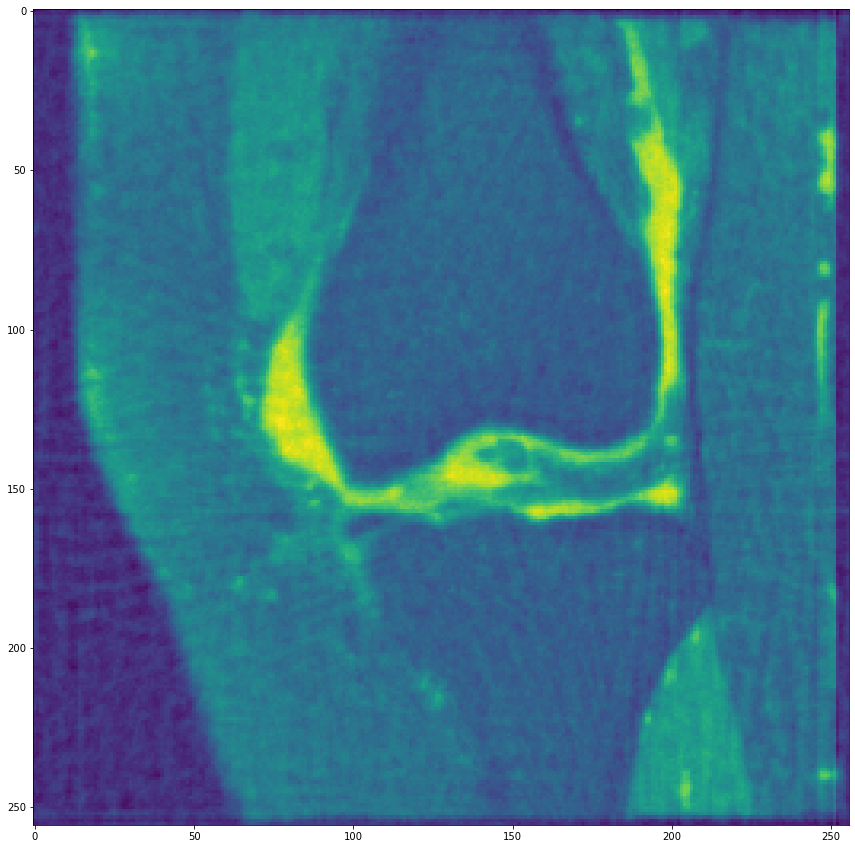

In [40]:
mask = True
noise = 3e-3
# noise = 1e-10
recon_torch = MRI_Op.adjoint_torch(MRI_Op.add_noise(MRI_Op.forward_torch(sample_torch.cuda(), mask=mask), noise_level=noise), mask=mask).cpu()
plt.figure(figsize=(15,15))
plt.imshow(recon_torch[0,0,...,0])

In [ ]:
recon = MRI_Op.adjoint(MRI_Op.forward(sample))
plt.figure(figsize=(15,15))
plt.imshow(recon)

In [ ]:
(recon - (recon_torch[0,...,0]).numpy()).max()

In [ ]:
s = recon_torch.shape[:-1]
s

In [ ]:
torch.abs(recon_torch).max()

In [ ]:
plt.imshow(utils.ifftshift(sample_torch, dim=(-2,-3))[0,...,0])
plt.colorbar()

In [ ]:
ft_torch = utils.fft2c(sample_torch)

In [ ]:
ft_torch = utils.tensor_to_complex_np(ft_torch)

In [ ]:
plt.imshow(np.log(np.abs(ft_torch)[0,...]+1))

In [ ]:
plt.imshow(np.log(np.abs(np.real(ft))+1))

In [ ]:
plt.imshow()

In [ ]:
(ft_torch - ft).max()

In [ ]:
(ft_torch[0,...,0]).max()

In [ ]:
np.real(ft).max()

In [ ]:
MRI_Op = MRI(size=256, subsampling=1e2)

In [ ]:
MRI_Op

In [ ]:
plt.imshow(mask)

In [ ]:
mask.mean()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.log(np.abs(np.real(ft)))+1)
plt.colorbar()
plt.subplot(122)
plt.imshow(np.log(np.abs(np.imag(ft))+1))
plt.colorbar()

In [ ]:
delta = .001
M = np.abs(ft).max()
print(M)
ft_n = ft+delta*M*np.random.normal(size=(256, 256))

In [ ]:
ft = MRI_Op.forward(sample)

In [ ]:
plt.imshow(np.log(np.abs(np.real(ft))+1))
plt.colorbar()

In [ ]:
plt.imshow(np.real(MRI_Op.forward(sample)))
plt.colorbar()

In [ ]:
m = False
plt.figure(figsize=(10,10))
plt.imshow(MRI_Op.inverse(MRI_Op.forward(sample, mask=m), mask=m))
plt.colorbar()

In [ ]:
m = False
plt.figure(figsize=(10,10))
plt.imshow(MRI_Op.inverse(MRI_Op.forward(sample, mask=m), mask=m))
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(np.fft.ifft2(np.fft.ifftshift(ft*mask))))
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(np.fft.ifft2(np.fft.ifftshift(ft))))
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(np.fft.ifft2(np.fft.ifftshift(ft))))
plt.colorbar()

In [ ]:
np.random.normal(size=(256, 256))

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [ ]:
train_data = DataLoader(fMRIData(), batch_size=4,
                        shuffle=True, num_workers=4, drop_last=False)

In [ ]:
len(train_data)

In [ ]:
for i, s in enumerate(train_data):
    print(s.shape)
    plt.figure()
    plt.imshow((s[0,0,...]).numpy())
    plt.colorbar()
    if i>3:
        break